In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
import scipy as sp
import scipy.linalg as la
import scipy.stats as stats

In [4]:
import covidcast
from datetime import date

In [131]:
data = pd.read_feather('covidcast_012220_080120_state.feather')

In [132]:
Y_raw = np.array(data[data.geo_value == 'pa'].deaths)
A_raw = np.array(data[data.geo_value == 'pa'].iloc[:,3:])

In [102]:
np.array(date(2022,12,11))

array(datetime.date(2022, 12, 11), dtype=object)

In [103]:
days = (data[data.geo_value == 'pa'].time_value - pd.to_datetime(date(2022,12,11))).dt.days % 7

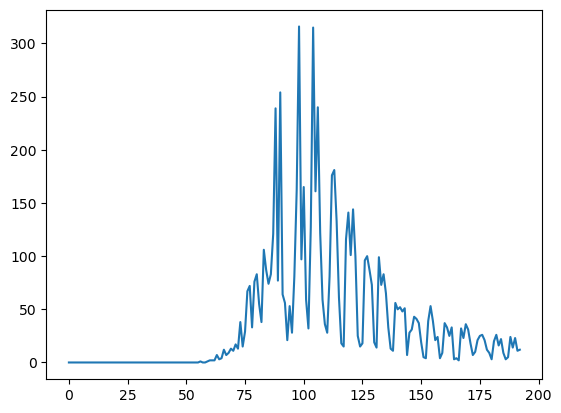

In [106]:
plt.plot(Y_raw)
# plt.plot(np.isin(days, [0,6]) * 50)

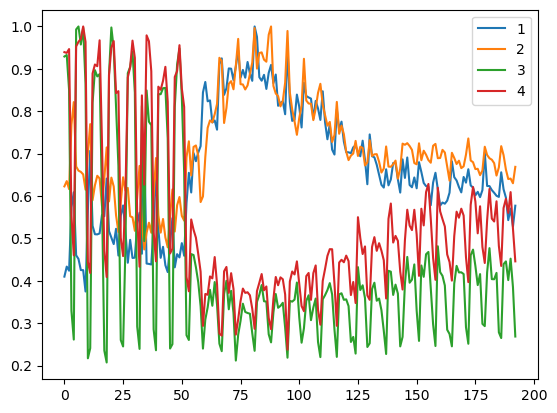

In [107]:
plt.plot(A_raw/np.max(A_raw, 0), label=[1,2,3,4])
plt.legend()

# 2. EDA

In [108]:
POI = np.sum(np.nancumsum(Y_raw) < 10)
Y_data = np.maximum(Y_raw[POI:], 0)

In [109]:
T = Y_data.shape[0]
T0 = 20
alpha = 1
K = 6.5

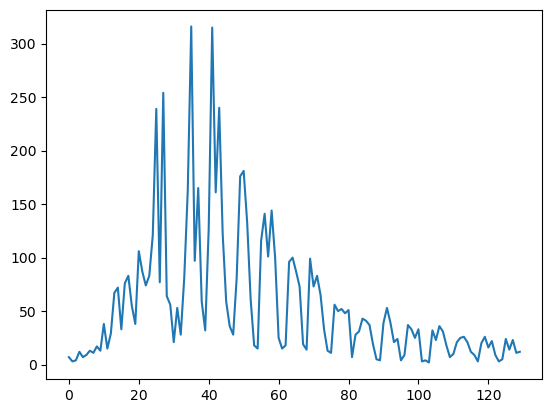

In [110]:
plt.plot(Y_data)

In [111]:
GPi = np.load('EuropeCovid2_GPi.npz')

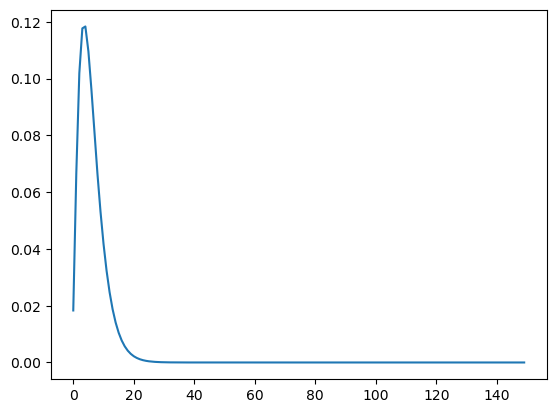

In [112]:
# g
g = np.zeros(T+T0)
g[:GPi['g'].shape[0]] = GPi['g']
plt.plot(g)

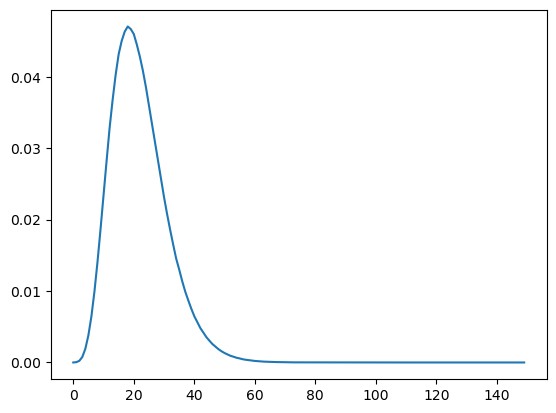

In [113]:
# pi
pi = np.zeros(T+T0)
pi[:GPi['pi'].shape[0]] = GPi['pi']
plt.plot(pi)

In [114]:
# A
d = 5
A = np.zeros([T+T0, d])

In [115]:
A[:,0] = np.full(T+T0, 1)
A[:,1:] = A_raw[POI-T0:,:]/np.max(A_raw, 0)

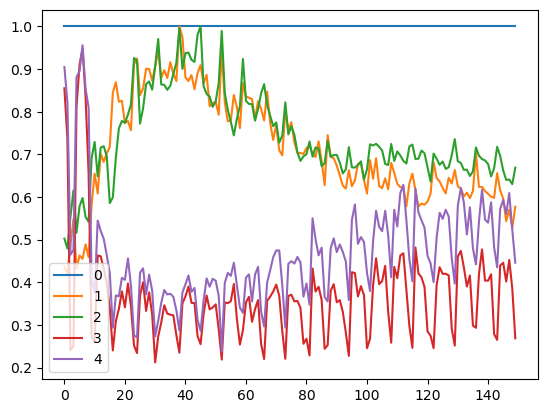

In [116]:
plt.plot(A, label=[0,1,2,3,4])
plt.legend()

# 3. EDA

/var/folders/59/z73jwy6j40jbh0pnn1fv948r0000gn/T/ipykernel_723/1469397498.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.isin(days[POI:], [0,6])*300)


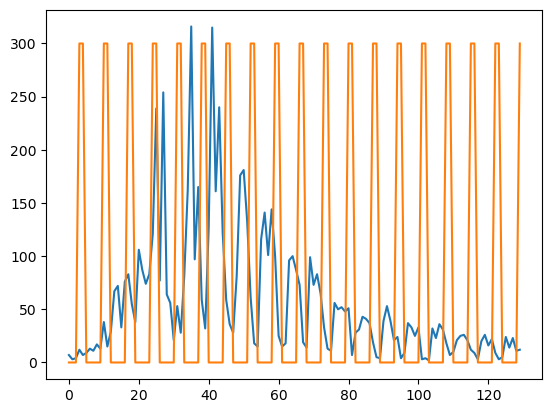

In [117]:
plt.plot(Y_data)
plt.plot(np.isin(days[POI:], [0,6])*300)

/var/folders/59/z73jwy6j40jbh0pnn1fv948r0000gn/T/ipykernel_723/278471814.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.isin(days[POI-T0:], [0,6]))


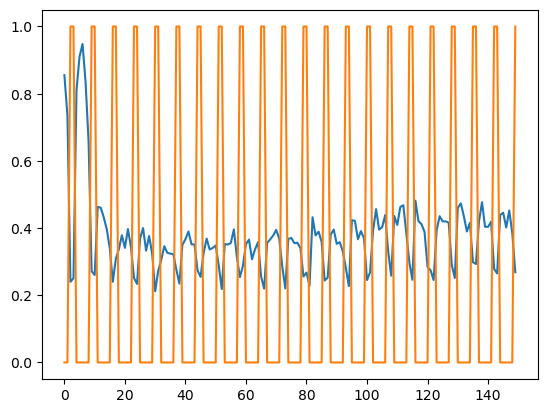

In [118]:
plt.plot(A[:,3])
plt.plot(np.isin(days[POI-T0:], [0,6]))

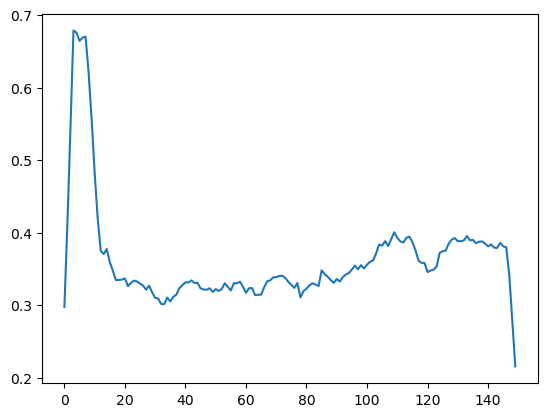

In [119]:
plt.plot(sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same'))

/var/folders/59/z73jwy6j40jbh0pnn1fv948r0000gn/T/ipykernel_723/2371437086.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.isin(days[POI-T0:], [0,6]))


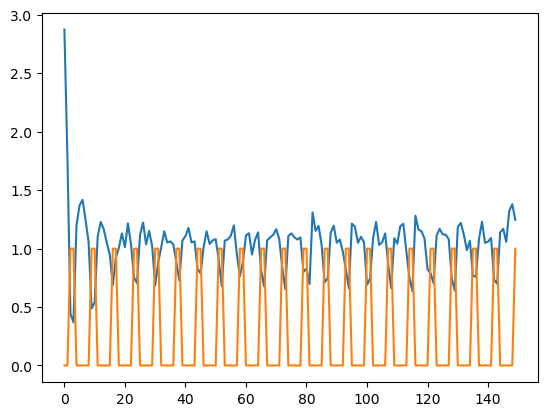

In [120]:
plt.plot(A[:,3] / sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same'))
plt.plot(np.isin(days[POI-T0:], [0,6]))

In [121]:
A[:,3].shape

(150,)

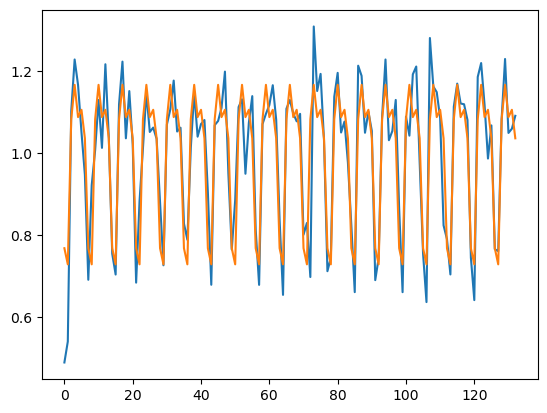

In [123]:
plt.plot(A[9:-8,3] / sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same')[9:-8])
plt.plot((np.mean((A[9:-8,3] / sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same')[9:-8]).reshape([-1,7]),
         0) * np.full(19,1)[:,None]).reshape([-1]))

/var/folders/59/z73jwy6j40jbh0pnn1fv948r0000gn/T/ipykernel_723/4204000134.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.isin(days[POI-T0:], [0,6])[9:-8] * 0.6 + 0.6)


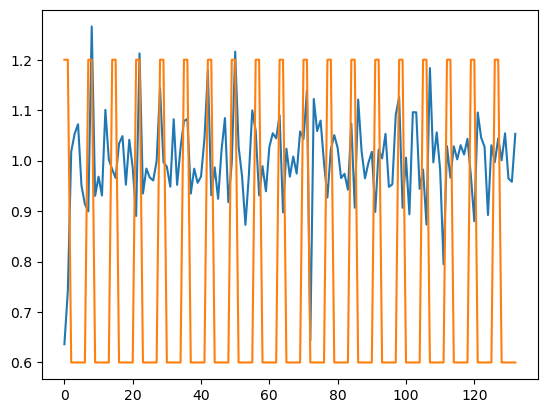

In [124]:
plt.plot(A[9:-8,3] / sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same')[9:-8]
         / (np.mean((A[9:-8,3] / sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same')[9:-8]).reshape([-1,7]),
         0) * np.full(19,1)[:,None]).reshape([-1]))
plt.plot(np.isin(days[POI-T0:], [0,6])[9:-8] * 0.6 + 0.6)

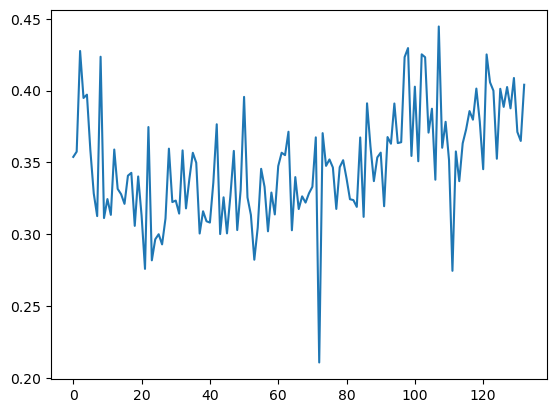

In [127]:
plt.plot(A[9:-8,3] 
         / (np.mean((A[9:-8,3] / sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same')[9:-8]).reshape([-1,7]),
         0) * np.full(19,1)[:,None]).reshape([-1]))

/var/folders/59/z73jwy6j40jbh0pnn1fv948r0000gn/T/ipykernel_723/2545415157.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.isin(days[POI-T0:], [0,6])[9:-8]*0.2+0.2)


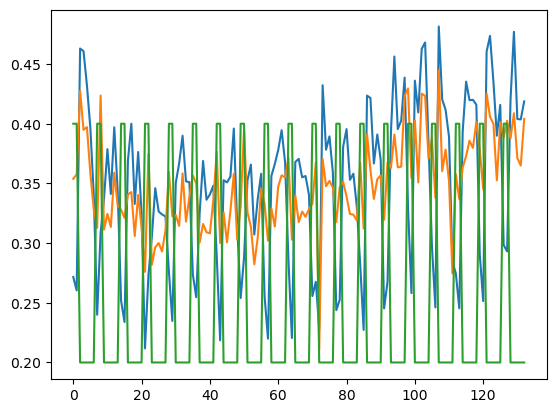

In [125]:
plt.plot(A[9:-8,3])
plt.plot(A[9:-8,3] 
         / (np.mean((A[9:-8,3] / sp.signal.convolve(A[:,3], np.full(7,1)/7, mode='same')[9:-8]).reshape([-1,7]),
         0) * np.full(19,1)[:,None]).reshape([-1]))
plt.plot(np.isin(days[POI-T0:], [0,6])[9:-8]*0.2+0.2)

# 3. fit by EM algorithm

In [33]:
def NBLL(y, m, r):
    y = int(y)
    return (np.sum(np.log(1+(r-1)/(np.arange(y)+1))) 
            + r * np.log(r/(r+m)) 
            + y * np.log(m/(r+m)))

In [34]:
def dNBLLdr(y, m, r):
    y = int(y)
    return (np.sum(1/(np.arange(y)+r)) + np.log(r/(r+m)) + (m-y)/(r+m))

In [35]:
def d2NBLLdr2(y, m, r):
    y = int(y)
    return (-np.sum(1/(np.arange(y)+r)**2) + 1/r + 1/(r+m) - (m-y)/(r+m)**2)

In [36]:
def fit(obs, rinit, minit_0, binit,
        n_iter=3000, history=False, verbose=False, step_size=0.1):
    
    rhat = rinit
    mhat_0 = minit_0
    bhat= np.array(binit)
    ss = np.inf
        
    if history:
        rhs = np.zeros(n_iter)
        mhs_0 = np.zeros(n_iter)
        bhs = np.zeros([n_iter, d])
        lls = np.zeros(n_iter)
        
    Rhat = np.zeros(T+T0)
    d1Rh = np.zeros([d, T+T0])
    d2Rh = np.zeros([d, d, T+T0])
    
    for t in np.arange(T+T0):
        o = np.exp(- bhat @ A[t])
        p = 1 / (1 + o)
        q = o / (1 + o)

        Rhat[t] = K * p
        d1Rh[:,t] = K * p * q * A[t]
        d2Rh[:,:,t] = K * p * q * (q - p) * (A[t,:,None] * A[t])

    Pi = alpha * np.concatenate([[0],pi])[np.maximum(0, T0 + np.arange(T)[:,None] - np.arange(T+T0))]
    G = Rhat[:,None] * np.concatenate([[0],g])[np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    inv_ImG = la.inv(np.eye(T+T0)-G)
    Pi_inv_ImG = Pi @ inv_ImG
    
    EY = mhat_0 * Pi_inv_ImG[:,0]
    ll = np.sum([NBLL(y, m, rhat) for y, m in zip(obs, EY)])
    
    if verbose:
        print("Before EM, ll: %f"%ll)
    
    for i in np.arange(n_iter):
        start_iter = time.time()

        # derivatives
        d1G = d1Rh[:,:,None] * np.concatenate([[0],g])[
                np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
        d2G = d2Rh[...,None] * np.concatenate([[0],g])[
                np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
        
        d1EY = mhat_0 * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0]
        d2EY = mhat_0 * (Pi_inv_ImG @ (
            d1G[:,None] @ inv_ImG @ d1G @ inv_ImG[:,:1]
            + d1G @ inv_ImG @ d1G[:,None] @ inv_ImG[:,:1]
            + d2G @ inv_ImG[:,:1]))[...,0]
        
        # first derivative
        dldEY = obs/EY - (rhat+obs)/(rhat+EY)
        
        dldr = np.sum([dNBLLdr(y, m, rhat) for y, m in zip(obs, EY)])
        dldm = np.sum(dldEY * Pi_inv_ImG[:,0])
        dldb = np.sum(dldEY * d1EY, 1)

        dldth = np.concatenate([[dldr, dldm], dldb])
        
        # second deivative
        d2ldEY2 = - obs/EY**2 + (rhat+obs)/(rhat+EY)**2
        d2ldrdEY = - 1/(rhat+EY) + (rhat+obs)/(rhat+EY)**2

        d2ldr2 = np.sum([d2NBLLdr2(y, m, rhat) for y, m in zip(obs, EY)])
        d2ldm2 = np.sum(d2ldEY2 * Pi_inv_ImG[:,0]**2)
        d2ldb2 = np.sum(d2ldEY2 * d1EY * d1EY[:,None,:], 2) \
               + np.sum(dldEY * d2EY, 2)

        d2ldrdm = np.sum(d2ldrdEY * Pi_inv_ImG[:,0])
        d2ldrdb = np.sum(d2ldrdEY * d1EY, 1)
        d2ldmdb = np.sum(d2ldEY2 * Pi_inv_ImG[:,0] * d1EY, 1) \
                + np.sum(dldEY * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0], 1)
        
        d2ldrm2 = np.array([[d2ldr2, d2ldrdm],
                            [d2ldrdm, d2ldm2]])
        d2ldrmdb = np.stack([d2ldrdb, 
                             d2ldmdb])
        
        d2ldth2 = np.block([[d2ldrm2, d2ldrmdb],
                            [d2ldrmdb.T, d2ldb2]])
        
        # Newton's method
        u, v = la.eig(-d2ldth2)
        # dth = np.real(((v/u) @ v.T) @ dldth)
        dth = np.real(((v/np.maximum(u,np.max(u)/1000)) @ v.T) @ dldth)
        ss = np.min([1, 1/np.sqrt(np.sum(dth**2))])
        
        rhat = np.abs(rhat + ss * dth[0])
        mhat_0 = mhat_0 + ss * dth[1]
        bhat = bhat + ss * dth[2:]
        
        for t in np.arange(T+T0):
            o = np.exp(- bhat @ A[t])
            p = 1 / (1 + o)
            q = o / (1 + o)

            Rhat[t] = K * p
            d1Rh[:,t] = K * p * q * A[t]
            d2Rh[:,:,t] = K * p * q * (q - p) * (A[t,:,None] * A[t])

        Pi = alpha * np.concatenate([[0],pi])[np.maximum(0, T0 + np.arange(T)[:,None] - np.arange(T+T0))]
        G = Rhat[:,None] * np.concatenate([[0],g])[np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
        inv_ImG = la.inv(np.eye(T+T0)-G)
        Pi_inv_ImG = Pi @ inv_ImG
    
        EY = mhat_0 * Pi_inv_ImG[:,0]
        ll = np.sum([NBLL(y, m, rhat) for y, m in zip(obs, EY)])
    
        if history:
            rhs[i] = rhat
            mhs_0[i] = mhat_0
            bhs[i] = bhat
            lls[i] = ll
        
        if verbose:
            print("%d-th iteration finished, ll: %f, lapse: %.3fsec."
                  %(i+1, ll, time.time()-start_iter))
            
    if history:
        return rhs, mhs_0, bhs
    else:
        return rhat, mhat_0, bhat

In [37]:
rmle = 5.2
mmle_0 = 25.3
bmle = [0, 0, 0, 0, 0]

In [38]:
rhs, mhs_0, bhs =\
    fit(Y_data, rmle, mmle_0, bmle, 
        history=True, verbose=True, n_iter=10000, step_size=1)

Before EM, ll: -7966.922446
1-th iteration finished, ll: -2622.343885, lapse: 0.041sec.
2-th iteration finished, ll: -1972.197283, lapse: 0.015sec.
3-th iteration finished, ll: -1562.538069, lapse: 0.063sec.
4-th iteration finished, ll: -1272.046422, lapse: 0.017sec.
5-th iteration finished, ll: -1076.903437, lapse: 0.031sec.
6-th iteration finished, ll: -918.132541, lapse: 0.020sec.
7-th iteration finished, ll: -787.620963, lapse: 0.015sec.
8-th iteration finished, ll: -876.744498, lapse: 0.012sec.
9-th iteration finished, ll: -819.833537, lapse: 0.024sec.
10-th iteration finished, ll: -779.033287, lapse: 0.020sec.
11-th iteration finished, ll: -751.880709, lapse: 0.029sec.
12-th iteration finished, ll: -738.035185, lapse: 0.022sec.
13-th iteration finished, ll: -732.077184, lapse: 0.015sec.
14-th iteration finished, ll: -728.490921, lapse: 0.014sec.
15-th iteration finished, ll: -725.289998, lapse: 0.018sec.
16-th iteration finished, ll: -722.150992, lapse: 0.015sec.
17-th iteration 

KeyboardInterrupt: 

In [36]:
rmle = rhs[-1]
mmle_0 = mhs_0[-1]
bmle = bhs[-1]

In [37]:
rmle, mmle_0, bmle

(2.074331513936522,
 54.220544249737436,
 array([-0.05255793, -6.60469875,  2.3597166 , 14.22318613, -9.9588003 ]))

## plots

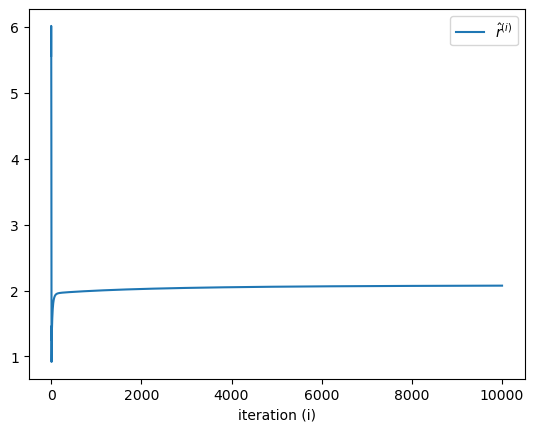

In [38]:
plt.plot(rhs, label=r"$\hat{r}^{(i)}$")
plt.xlabel("iteration (i)"); plt.legend()

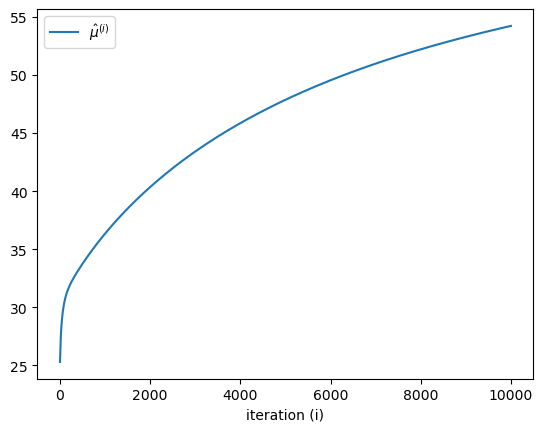

In [39]:
plt.plot(mhs_0, label=r"$\hat{\mu}^{(i)}$")
plt.xlabel("iteration (i)"); plt.legend()

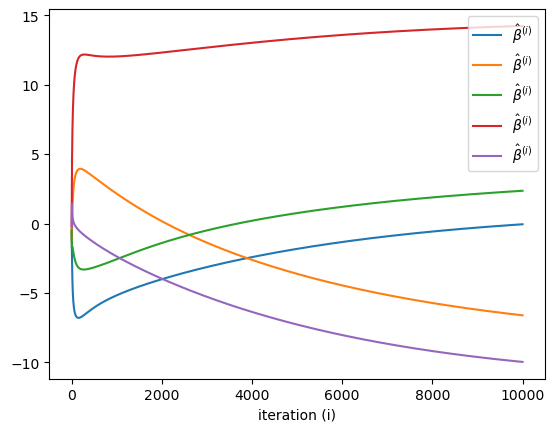

In [40]:
plt.plot(bhs, label=r"$\hat{\beta}^{(i)}$")
plt.xlabel("iteration (i)"); plt.legend()

# 4. Wald's Confidence Region

In [41]:
Rmle = np.zeros(T+T0)
d1Rm = np.zeros([d, T+T0])
d2Rm = np.zeros([d, d, T+T0])

In [42]:
for t in np.arange(T+T0):
    o = np.exp(- bmle @ A[t])
    p = 1 / (1 + o)
    q = o / (1 + o)

    Rmle[t] = K * p
    d1Rm[:,t] = K * p * q * A[t]
    d2Rm[:,:,t] = K * p * q * (q - p) * (A[t,:,None] * A[t])

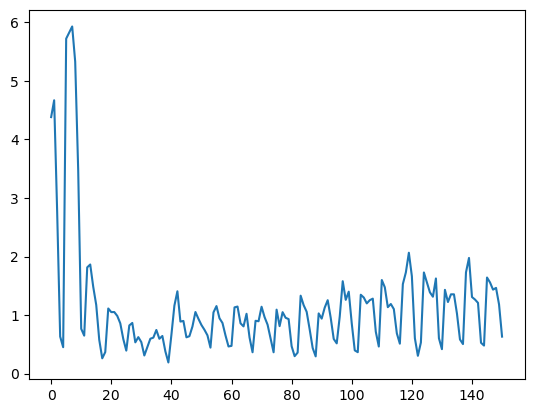

In [43]:
plt.plot(Rmle)

In [44]:
Pi = alpha * np.concatenate([[0],pi])[np.maximum(0, T0 + np.arange(T)[:,None] - np.arange(T+T0))]
G = Rmle[:,None] * np.concatenate([[0],g])[np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]

In [45]:
d1G = d1Rm[:,:,None] * np.concatenate([[0],g])[
        np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
d2G = d2Rm[...,None] * np.concatenate([[0],g])[
        np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]

In [46]:
inv_ImG = la.inv(np.eye(T+T0)-G)

In [47]:
Pi_inv_ImG = Pi @ inv_ImG

In [48]:
EY = mmle_0 * Pi_inv_ImG[:,0]

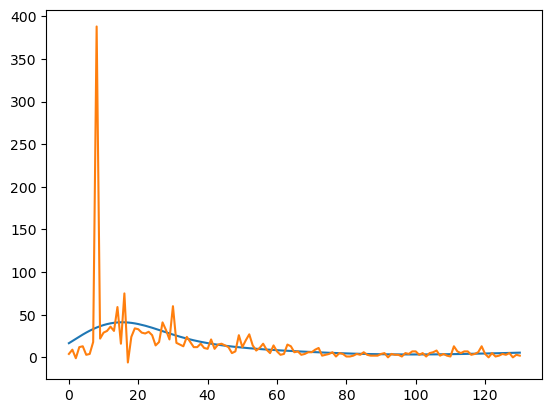

In [49]:
plt.plot(EY)
plt.plot(Y_data)

In [50]:
d1EY = mmle_0 * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0]

In [51]:
d2EY = mmle_0 * (Pi_inv_ImG @ (
    d1G[:,None] @ inv_ImG @ d1G @ inv_ImG[:,:1]
    + d1G @ inv_ImG @ d1G[:,None] @ inv_ImG[:,:1]
    + d2G @ inv_ImG[:,:1]))[...,0]

In [52]:
dldEY = Y_data/EY - (rmle+Y_data)/(rmle+EY)
d2ldEY2 = - Y_data/EY**2 + (rmle+Y_data)/(rmle+EY)**2
d2ldrdEY = - 1/(rmle+EY) + (rmle+Y_data)/(rmle+EY)**2

In [53]:
d2ldr2 = np.sum([d2NBLLdr2(y, m, rmle) for y, m in zip(Y_data, EY)])
d2ldm2 = np.sum(d2ldEY2 * Pi_inv_ImG[:,0]**2)
d2ldb2 = np.sum(d2ldEY2 * d1EY * d1EY[:,None,:], 2) \
       + np.sum(dldEY * d2EY, 2)

d2ldrdm = np.sum(d2ldrdEY * Pi_inv_ImG[:,0])
d2ldrdb = np.sum(d2ldrdEY * d1EY, 1)
d2ldmdb = np.sum(d2ldEY2 * Pi_inv_ImG[:,0] * d1EY, 1) \
        + np.sum(dldEY * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0], 1)

In [54]:
d2ldrm2 = np.array([[d2ldr2, d2ldrdm],
                    [d2ldrdm, d2ldm2]])
d2ldrmdb = np.stack([d2ldrdb, 
                     d2ldmdb])

In [55]:
Ihat_dth = - np.block([[d2ldrm2, d2ldrmdb],
                       [d2ldrmdb.T, d2ldb2]])

In [56]:
Ihat_dth

array([[-1.60322672e+01, -9.95493521e-03,  2.51511427e+00,
         1.67378535e+00,  1.75409039e+00,  9.99192613e-01,
         1.19717339e+00],
       [-9.95493521e-03,  7.34293175e-02,  2.42235518e+01,
         1.65789525e+01,  1.74751288e+01,  9.98269581e+00,
         1.14501439e+01],
       [ 2.51511427e+00,  2.42235518e+01,  1.19281898e+04,
         8.14257604e+03,  8.60746871e+03,  4.85622814e+03,
         5.61786519e+03],
       [ 1.67378535e+00,  1.65789525e+01,  8.14257604e+03,
         5.56409457e+03,  5.88076943e+03,  3.31347985e+03,
         3.83115481e+03],
       [ 1.75409039e+00,  1.74751288e+01,  8.60746871e+03,
         5.88076943e+03,  6.21576977e+03,  3.50269324e+03,
         4.05043690e+03],
       [ 9.99192613e-01,  9.98269581e+00,  4.85622814e+03,
         3.31347985e+03,  3.50269324e+03,  1.97834721e+03,
         2.28865809e+03],
       [ 1.19717339e+00,  1.14501439e+01,  5.61786519e+03,
         3.83115481e+03,  4.05043690e+03,  2.28865809e+03,
         2.6486580

In [57]:
la.inv(Ihat_dth)[2:,2:]

array([[  58.11714639,  -67.84664208,   13.94558679,   84.35411482,
        -118.94296916],
       [ -67.84664208,  102.12877903,  -38.20781916, -109.10036965,
         148.4476273 ],
       [  13.94558679,  -38.20781916,   24.86231102,   26.72800867,
         -35.43034971],
       [  84.35411482, -109.10036965,   26.72800867,  154.6531122 ,
        -194.58664337],
       [-118.94296916,  148.4476273 ,  -35.43034972, -194.58664337,
         258.77577628]])

In [58]:
# intercept, completely home, full time, part time, median dwell time at home

In [59]:
np.sqrt(np.diag(la.inv(Ihat_dth))[2:])

array([ 7.62346026, 10.10587844,  4.98621209, 12.43596045, 16.08650914])

In [60]:
bmle

array([-0.05255793, -6.60469875,  2.3597166 , 14.22318613, -9.9588003 ])

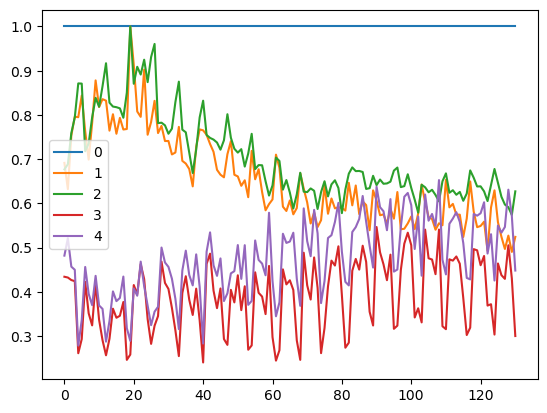

In [61]:
plt.plot(A[T0:,:], label=[0,1,2,3,4])
plt.legend()

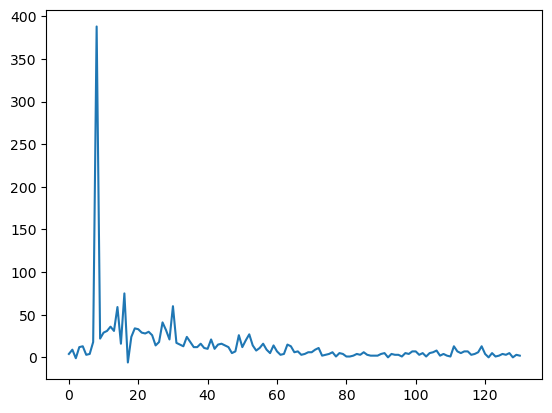

In [62]:
plt.plot(Y_data)

# 5. Sandwich estimator

In [63]:
L_HAC = np.floor(4* (T/100)**(2/9))

In [64]:
w_HAC = np.maximum(1 - np.abs(np.arange(T)[:,None] - np.arange(T))/L_HAC, 0)

In [65]:
dltdr = np.array([dNBLLdr(y, m, rmle) for y, m in zip(Y_data, EY)])
dltdm = dldEY * Pi_inv_ImG[:,0]
dltdb = dldEY * d1EY

In [66]:
dltdth = np.concatenate([np.array([dltdr, dltdm]), dltdb], 0)

In [67]:
VEdl = dltdth @ w_HAC @ dltdth.T

In [68]:
VEdl

array([[ 6.52978361e+01, -1.95098988e+00, -7.67379228e+01,
        -3.99314653e+01, -4.28575921e+01, -4.39517355e+01,
        -4.91834614e+01],
       [-1.95098988e+00,  1.56653217e-01,  2.54510750e+01,
         1.66174665e+01,  1.76257016e+01,  1.11043531e+01,
         1.27682249e+01],
       [-7.67379228e+01,  2.54510750e+01,  1.16618715e+04,
         7.84818228e+03,  8.31939010e+03,  4.79531730e+03,
         5.57852703e+03],
       [-3.99314653e+01,  1.66174665e+01,  7.84818228e+03,
         5.28991092e+03,  5.60631811e+03,  3.22214581e+03,
         3.74729915e+03],
       [-4.28575921e+01,  1.76257016e+01,  8.31939010e+03,
         5.60631811e+03,  5.94192910e+03,  3.41601321e+03,
         3.97313949e+03],
       [-4.39517355e+01,  1.11043531e+01,  4.79531730e+03,
         3.22214581e+03,  3.41601321e+03,  1.97649235e+03,
         2.29891428e+03],
       [-4.91834614e+01,  1.27682249e+01,  5.57852703e+03,
         3.74729915e+03,  3.97313949e+03,  2.29891428e+03,
         2.6747830

In [69]:
Ihat_sdw = Ihat_dth @ la.inv(VEdl) @ Ihat_dth

In [70]:
Ihat_sdw

array([[ 1.01146624e+01, -2.24030930e-01, -6.28410720e+00,
        -2.84082158e+00, -2.86954571e+00, -4.91424238e+00,
        -4.92422565e+00],
       [-2.24030930e-01,  9.96944419e-02,  3.26262592e+01,
         2.25477282e+01,  2.37013756e+01,  1.33932947e+01,
         1.52786688e+01],
       [-6.28410720e+00,  3.26262592e+01,  1.46989817e+04,
         1.01276957e+04,  1.06827289e+04,  5.96650782e+03,
         6.86215813e+03],
       [-2.84082158e+00,  2.25477282e+01,  1.01276957e+04,
         6.98469052e+03,  7.36652468e+03,  4.10929304e+03,
         4.72381192e+03],
       [-2.86954570e+00,  2.37013756e+01,  1.06827289e+04,
         7.36652468e+03,  7.76959845e+03,  4.33435150e+03,
         4.98310202e+03],
       [-4.91424238e+00,  1.33932947e+01,  5.96650782e+03,
         4.10929305e+03,  4.33435150e+03,  2.42371370e+03,
         2.78729269e+03],
       [-4.92422565e+00,  1.52786688e+01,  6.86215814e+03,
         4.72381192e+03,  4.98310202e+03,  2.78729269e+03,
         3.2067479

In [71]:
Ihat_dth

array([[-1.60322672e+01, -9.95493521e-03,  2.51511427e+00,
         1.67378535e+00,  1.75409039e+00,  9.99192613e-01,
         1.19717339e+00],
       [-9.95493521e-03,  7.34293175e-02,  2.42235518e+01,
         1.65789525e+01,  1.74751288e+01,  9.98269581e+00,
         1.14501439e+01],
       [ 2.51511427e+00,  2.42235518e+01,  1.19281898e+04,
         8.14257604e+03,  8.60746871e+03,  4.85622814e+03,
         5.61786519e+03],
       [ 1.67378535e+00,  1.65789525e+01,  8.14257604e+03,
         5.56409457e+03,  5.88076943e+03,  3.31347985e+03,
         3.83115481e+03],
       [ 1.75409039e+00,  1.74751288e+01,  8.60746871e+03,
         5.88076943e+03,  6.21576977e+03,  3.50269324e+03,
         4.05043690e+03],
       [ 9.99192613e-01,  9.98269581e+00,  4.85622814e+03,
         3.31347985e+03,  3.50269324e+03,  1.97834721e+03,
         2.28865809e+03],
       [ 1.19717339e+00,  1.14501439e+01,  5.61786519e+03,
         3.83115481e+03,  4.05043690e+03,  2.28865809e+03,
         2.6486580

In [72]:
la.inv(Ihat_sdw)[2:,2:]

array([[  43.09199997,  -67.89300455,   31.17632857,   37.53172152,
         -73.8060296 ],
       [ -67.89300499,  168.6372222 , -111.35663943,  -51.79371626,
         116.87266975],
       [  31.17632903, -111.3566398 ,   85.55340812,   18.64019124,
         -53.34189013],
       [  37.53172167,  -51.79371571,   18.64019054,   41.98560416,
         -69.64984059],
       [ -73.80602982,  116.87266891,  -53.34188907,  -69.64984054,
         130.02856382]])

In [73]:
np.sqrt(np.diag(la.inv(Ihat_sdw))[2:])

array([ 6.56444971, 12.98603951,  9.24950853,  6.47962994, 11.40300679])